In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import optuna
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
#from sklearn.preprocessing import LabelEncoder
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import TimeSeriesSplit
color = sns.color_palette()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# EDA

In [2]:
# Load the data
df = pd.read_csv('forecasting_test.csv')

df.head(20)

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
0,3,2010,4,53.0,540.0,6.322805,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,3,2010,5,53.0,541.0,6.510683,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,3,2010,6,53.0,542.0,6.696693,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,3,2010,7,53.0,543.0,6.967286,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,3,2010,8,53.0,544.0,6.966908,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
5,3,2011,4,53.0,545.0,6.456377,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
6,3,2011,5,53.0,546.0,6.486542,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
7,3,2011,6,53.0,547.0,6.625392,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
8,3,2011,7,53.0,548.0,6.730977,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
9,3,2011,8,53.0,549.0,6.699666,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318240 entries, 0 to 318239
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hh_id        318240 non-null  int64  
 1   year         318240 non-null  int64  
 2   month        318240 non-null  int64  
 3   zipcode      316090 non-null  float64
 4   mozip        316090 non-null  float64
 5   lusage       318240 non-null  float64
 6   luse1        302820 non-null  float64
 7   luse2        308410 non-null  float64
 8   luse3        309330 non-null  float64
 9   luse4        309300 non-null  float64
 10  luse5        309300 non-null  float64
 11  luse6        309430 non-null  float64
 12  children     316090 non-null  float64
 13  hhsize2      318240 non-null  int64  
 14  hhsize3      318240 non-null  int64  
 15  hhsize4      318240 non-null  int64  
 16  hhsize5      318240 non-null  int64  
 17  hhsize5plus  318240 non-null  int64  
 18  income2      316090 non-

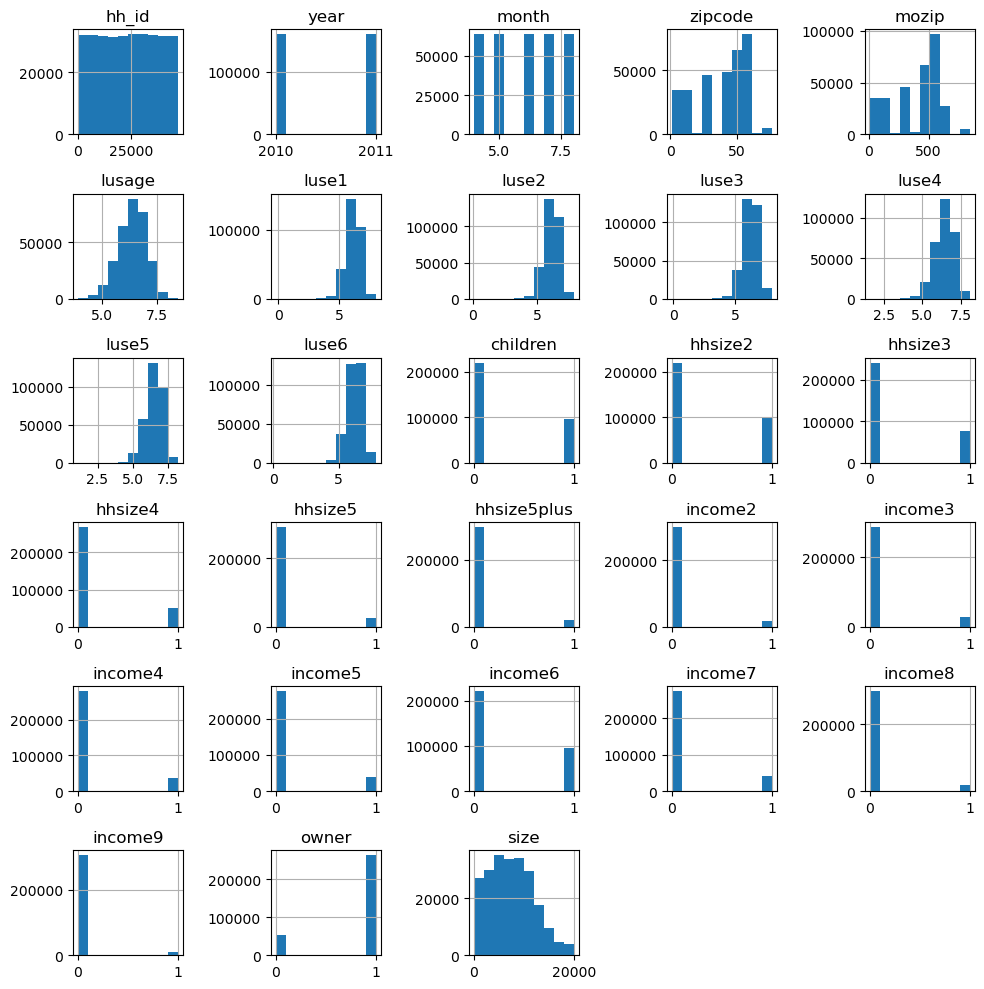

In [4]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [5]:
def calculate_statistics(data):
    print("Mean: ", data.mean())
    print("Median: ", data.median())
    print("Standard Deviation: ", data.std())
    print("Minimum: ", data.min())
    print("Maximum: ", data.max())
    print("Unique values: ", data.nunique())
    print("25th percentile: ", data.quantile(0.25))
    print("50th percentile: ", data.quantile(0.50))
    print("75th percentile: ", data.quantile(0.75))

for column in df.columns:
    print("\nStatistics for column: ", column)
    calculate_statistics(df[column])


Statistics for column:  hh_id
Mean:  23681.297479889392
Median:  23745.5
Standard Deviation:  13668.726916029207
Minimum:  3
Maximum:  47356
Unique values:  31824
25th percentile:  11851.75
50th percentile:  23745.5
75th percentile:  35462.25

Statistics for column:  year
Mean:  2010.5
Median:  2010.5
Standard Deviation:  0.5000007855724898
Minimum:  2010
Maximum:  2011
Unique values:  2
25th percentile:  2010.0
50th percentile:  2010.5
75th percentile:  2011.0

Statistics for column:  month
Mean:  6.0
Median:  6.0
Standard Deviation:  1.414215784307634
Minimum:  4
Maximum:  8
Unique values:  5
25th percentile:  5.0
50th percentile:  6.0
75th percentile:  7.0

Statistics for column:  zipcode
Mean:  38.45933120313835
Median:  42.0
Standard Deviation:  19.374453999653934
Minimum:  1.0
Maximum:  76.0
Unique values:  75
25th percentile:  28.0
50th percentile:  42.0
75th percentile:  54.0

Statistics for column:  mozip
Mean:  396.7650194564839
Median:  433.0
Standard Deviation:  200.030748

In [6]:
print("Missing values: ")
df.isnull().sum()

Missing values: 


hh_id              0
year               0
month              0
zipcode         2150
mozip           2150
lusage             0
luse1          15420
luse2           9830
luse3           8910
luse4           8940
luse5           8940
luse6           8810
children        2150
hhsize2            0
hhsize3            0
hhsize4            0
hhsize5            0
hhsize5plus        0
income2         2150
income3         2150
income4         2150
income5         2150
income6         2150
income7         2150
income8         2150
income9         2150
owner           2150
size           93710
dtype: int64

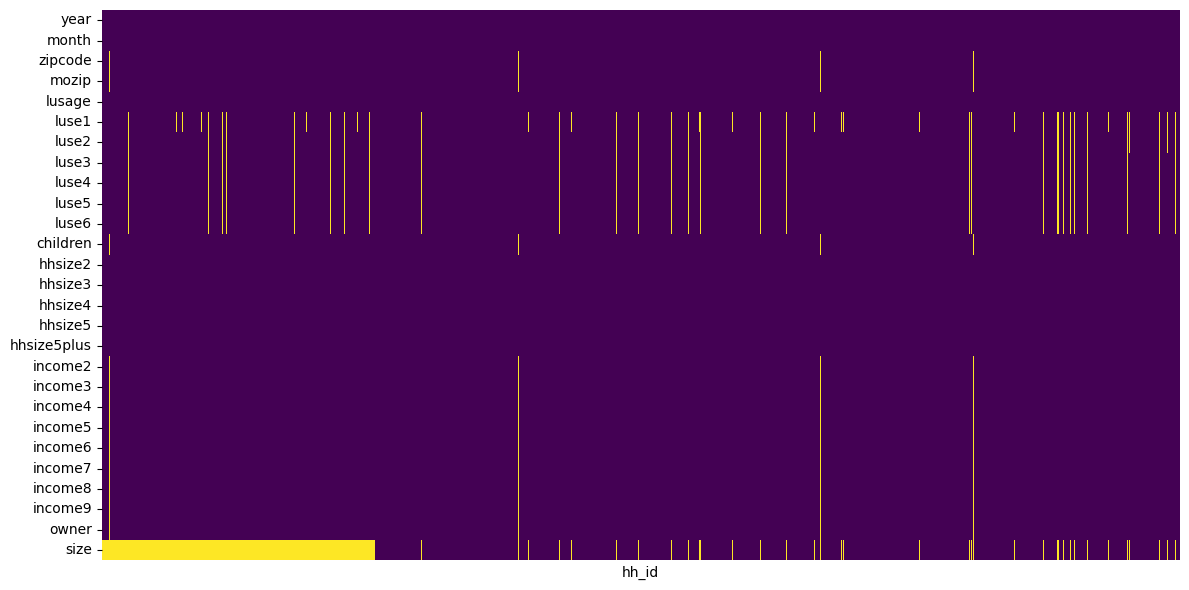

In [7]:
# There are multiple ways to handle the missing values, which I'll touch on later.
# For now let's check if the missing values are in the same rows or spread out.

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna().set_index('hh_id').transpose(), cbar=False, xticklabels=False, cmap='viridis')
plt.tight_layout()
plt.show()

In [8]:
df[df.isnull().any(axis=1)].head(10)

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
0,3,2010,4,53.0,540.0,6.322805,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,3,2010,5,53.0,541.0,6.510683,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,3,2010,6,53.0,542.0,6.696693,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,3,2010,7,53.0,543.0,6.967286,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,3,2010,8,53.0,544.0,6.966908,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
5,3,2011,4,53.0,545.0,6.456377,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
6,3,2011,5,53.0,546.0,6.486542,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
7,3,2011,6,53.0,547.0,6.625392,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
8,3,2011,7,53.0,548.0,6.730977,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
9,3,2011,8,53.0,549.0,6.699666,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


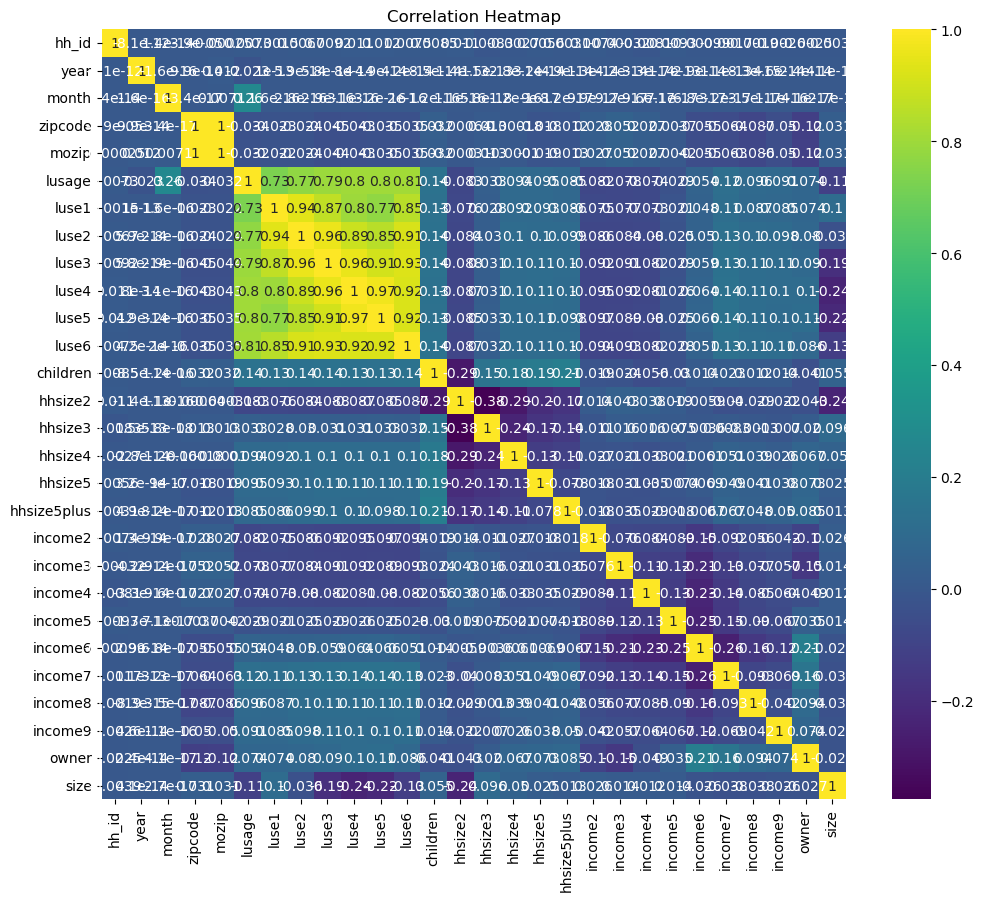

In [9]:
plt.figure(figsize(12,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

Correlation between 'zipcode' and 'mozip':  0.9992270489854008


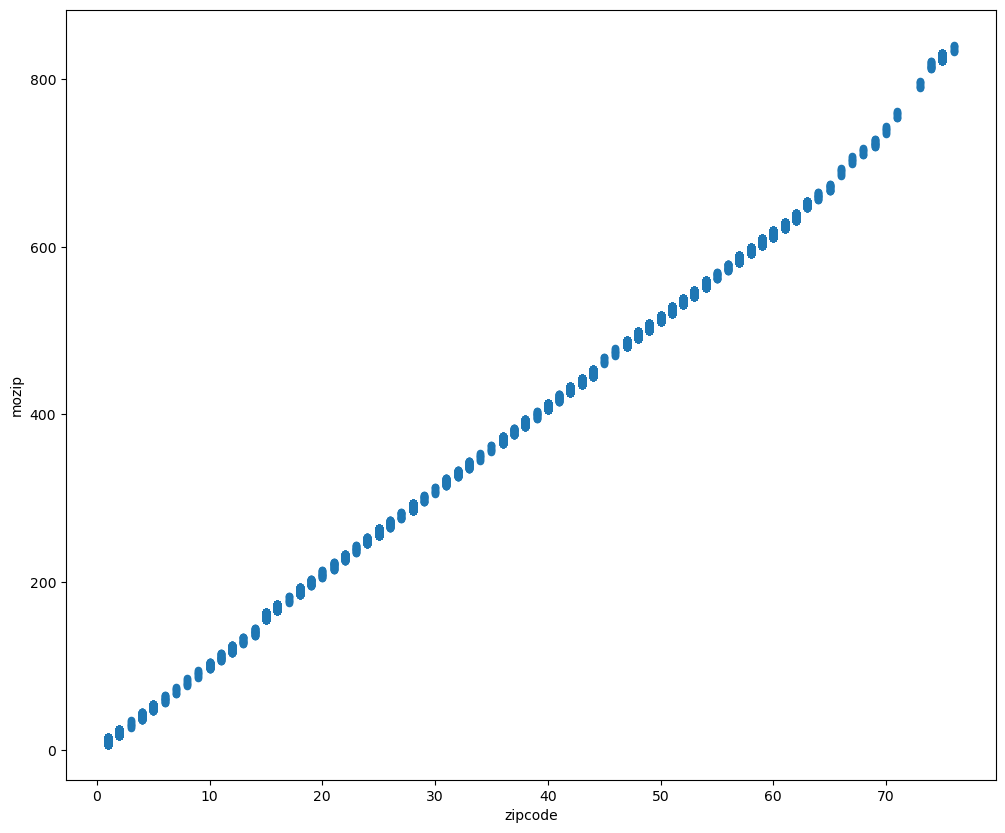

<Figure size 1000x500 with 0 Axes>

In [10]:
# The 'mozip' attribute seems to be highly correlated with zipcode and can be removed from the dataset. It won't add any new information to the model.

# Plotting the scatter plot to visualize the correlation between 'zipcode' and 'mozip'
print("Correlation between 'zipcode' and 'mozip': ", df['zipcode'].corr(df['mozip']))
df.plot.scatter(x='zipcode', y='mozip')
plt.figure(figsize=(10, 5))
plt.show()

In [11]:
df.drop('mozip', axis=1, inplace=True)

Number of zipcodes:  75


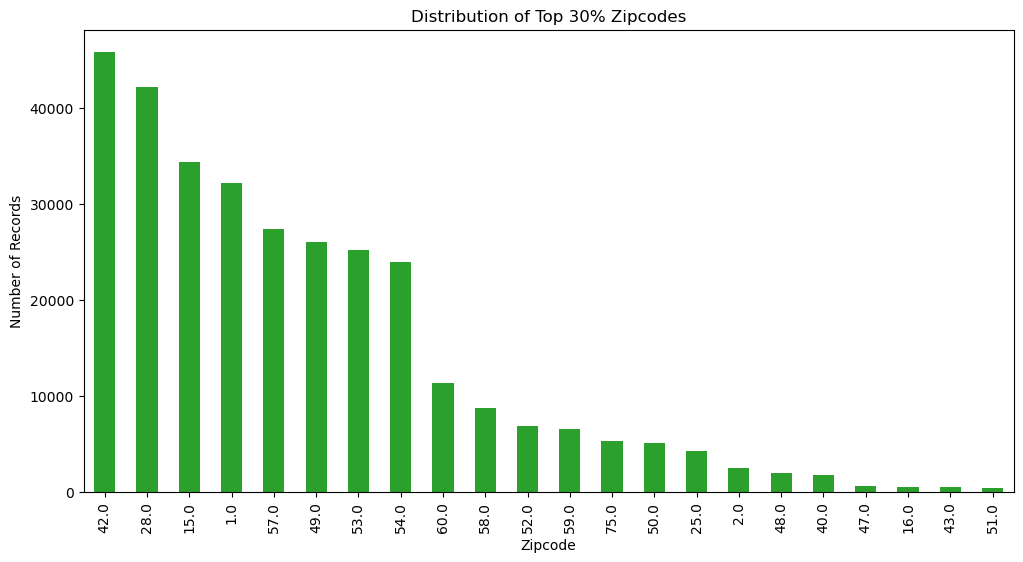

In [12]:
zipcode_counts = df['zipcode'].value_counts()
print("Number of zipcodes: ", len(zipcode_counts))

top30_percent = int(0.30 * len(zipcode_counts))


# Plot the distribution of the top 30% zipcodes
plt.figure(figsize=(12, 6))
zipcode_counts.head(top30_percent).plot(kind='bar', color=color[2])
plt.xlabel('Zipcode')
plt.ylabel('Number of Records')
plt.title('Distribution of Top 30% Zipcodes')
plt.show()

In [13]:
cols_with_nans = [x for x in df if df[x].isnull().any()]
print("Columns with missing values: ", cols_with_nans)

dataframes_dict = {'original': df.copy()}

income_cols = [col for col in df.columns if col.startswith('income')]
hhsize_cols = [col for col in df.columns if col.startswith('hhsize')]

# Create a single 'income' column, might not be the best way to handle this, because the salary ranges are not equal. But for now, let's keep it this way.
df['income'] = np.nan
for i, col in enumerate(income_cols, start=2):
    df.loc[df[col] == 1, 'income'] = i

for i, col in enumerate(hhsize_cols, start=2):
    df.loc[df[col] == 1, 'hh_size'] = i

df.drop(income_cols + hhsize_cols, axis=1, inplace=True)

num_cols_with_nan = ['luse1', 'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'size']
cat_cols_with_nan = ['zipcode', 'income', 'hh_size', 'owner', 'children']


Columns with missing values:  ['zipcode', 'luse1', 'luse2', 'luse3', 'luse4', 'luse5', 'luse6', 'children', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'size']


## 2. Imputing the missing values

In [14]:
#  There are multiple ways to handle missing values, some of them are:
# 1. Drop the rows with missing values, which is not recommended as it can lead to loss of valuable data which can be used for training the model.
# 2. Fill the missing values with the mean/ median/ mode of the category. This is an okayish/lazy approach, but it can lead to bias in the model.
# 3. Fill the missing values with a k nearest neighbour/MICE/M.L. algorithm, which are good methods, but can be computationally expensive.
# 4. Or leave it as it is, and let the model handle it.
#
# I will be comparing the results to see which method works best.

In [15]:
def apply_one_hot_encoding(data):
    # For income and hhsize
    data = pd.get_dummies(data, columns=['income', 'hh_size'], dtype=int)
    return data

def fill_cat_cols_with_mode(data):
    for col in cat_cols_with_nan:
        data[col].fillna(data[col].mode()[0], inplace=True)
    return data

In [16]:
# Method 1: Fill the missing values with the mean of the column and adding a new category for each missing value.
df_mean = df.copy()
for col in num_cols_with_nan:
    df_mean[col + '_missing'] = df_mean[col].isnull().astype(int)
    df_mean[col].fillna(df_mean[col].mean(), inplace=True)
for col in cat_cols_with_nan:
    df_mean[col + '_missing'] = df_mean[col].isnull().astype(int)
    
df_mean = fill_cat_cols_with_mode(df_mean)
dataframes_dict['mean'] = apply_one_hot_encoding(df_mean)

In [20]:
# Method 2 - Fill the missing values with the knn algorithm
df_knn = df.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn[num_cols_with_nan] = imputer.fit_transform(df_knn[num_cols_with_nan])
df_knn = fill_cat_cols_with_mode(df_knn)
dataframes_dict['knn'] = apply_one_hot_encoding(df_knn)

In [17]:
# Method 3 - Fill the missing values with the MICE algorithm
df_mice = df.copy()
def impute_mice(df, num_cols_with_nan):
    mice_imputer = IterativeImputer(estimator=CatBoostRegressor(n_estimators=200), max_iter=10, random_state=13)
    df[num_cols_with_nan] = mice_imputer.fit_transform(df[num_cols_with_nan])
    return df

df_mice = impute_mice(df_mice, num_cols_with_nan)
df_mice = fill_cat_cols_with_mode(df_mice)
dataframes_dict['mice'] = apply_one_hot_encoding(df_mice)

Learning rate set to 0.374931
0:	learn: 0.3997895	total: 115ms	remaining: 22.8s
1:	learn: 0.2973656	total: 130ms	remaining: 12.8s
2:	learn: 0.2382464	total: 143ms	remaining: 9.41s
3:	learn: 0.2056764	total: 158ms	remaining: 7.76s
4:	learn: 0.1889279	total: 172ms	remaining: 6.69s
5:	learn: 0.1804154	total: 187ms	remaining: 6.04s
6:	learn: 0.1761996	total: 201ms	remaining: 5.54s
7:	learn: 0.1737614	total: 215ms	remaining: 5.17s
8:	learn: 0.1719363	total: 230ms	remaining: 4.88s
9:	learn: 0.1709579	total: 244ms	remaining: 4.64s
10:	learn: 0.1699311	total: 259ms	remaining: 4.46s
11:	learn: 0.1689514	total: 273ms	remaining: 4.28s
12:	learn: 0.1683056	total: 287ms	remaining: 4.13s
13:	learn: 0.1677767	total: 302ms	remaining: 4.01s
14:	learn: 0.1673523	total: 315ms	remaining: 3.89s
15:	learn: 0.1669870	total: 329ms	remaining: 3.79s
16:	learn: 0.1662809	total: 343ms	remaining: 3.69s
17:	learn: 0.1657358	total: 357ms	remaining: 3.61s
18:	learn: 0.1652280	total: 370ms	remaining: 3.52s
19:	learn: 

c:\Users\zvix\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Model evaluation

Since this is a regression problem, we use RMSE, MAE, R2, and Adjusted R2 to evaluate model performance.
RMSE and MAE measure prediction accuracy by quantifying the average error, while R2 indicates the proportion of variance explained by the model.
Adjusted R² adjusts R2 for the number of predictors, providing a more accurate measure of model performance, especially when comparing models with different numbers of features.

In [18]:
def evaluate_model(X, y, y_pred):
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    adj_rs = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    return rmse, mae, r2, adj_rs

# Split the data into train and test
def split_train_test(data):
    X = data.drop('lusage', axis=1)
    y = data['lusage']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)
    return X_train, X_test, y_train, y_test

In [19]:
for dataframe in dataframes_dict:
    # set the index to the date and sort it for splitting the data
    dataframes_dict[dataframe]['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
    dataframes_dict[dataframe].set_index(['date', 'hh_id'], inplace=True)
    dataframes_dict[dataframe].sort_index(inplace=True, ascending=True)

# Let's check the original dataframe with missing values for a benchmark.

In [42]:
for dataframe in dataframes_dict:
    X_train, X_test, y_train, y_test = split_train_test(dataframes_dict[dataframe])
    model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, loss_function='RMSE', verbose=0, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse, mae, r2, adj_rs = evaluate_model(X_test, y_test, y_pred)
    print("Model: ", dataframe)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("R2: ", r2)
    print("Adjusted R2: ", adj_rs)
    print("\n")

Model:  original
RMSE:  0.32961736473791925
MAE:  0.2301075093108437
R2:  0.7279310010548018
Adjusted R2:  0.7278240926744675


Model:  drop
RMSE:  0.29855413188659335
MAE:  0.21114283151051266
R2:  0.7587803908805395
Adjusted R2:  0.7586845030209276


Model:  mean
RMSE:  0.32841338703224854
MAE:  0.2297071859009109
R2:  0.7299149181873975
Adjusted R2:  0.7297663144984168


Model:  knn
RMSE:  0.3286443591407873
MAE:  0.22947800490181483
R2:  0.7295348846085574
Adjusted R2:  0.7294371117924188


Model:  mice
RMSE:  0.2886689525991011
MAE:  0.19744495422434988
R2:  0.7888304715319865
Adjusted R2:  0.7887508137245389




In [20]:
# I will be using the MICE imputed dataset from now on.
df = dataframes_dict['mice']

In [21]:
def evaluate_regression_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse, mae, r2, adj_rs = evaluate_model(X_test, y_test, y_pred)
    
    print(f"Model: {model_name}")
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("R2: ", r2)
    print("Adjusted R2: ", adj_rs)
    print("\n")
    
    return model
X_train, X_test, y_train, y_test = split_train_test(df)

In [22]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('Decision Tree', DecisionTreeRegressor())
]

for model_name, model in models:
    evaluate_regression_model(model, model_name, X_train, X_test, y_train, y_test)

Model: Linear Regression
RMSE:  0.36970413911952094
MAE:  0.2706278196639609
R2:  0.657731037375427
Adjusted R2:  0.6575965442116533


Model: Random Forest
RMSE:  0.27661625024169345
MAE:  0.18111487095208612
R2:  0.8083917199646962
Adjusted R2:  0.8083164282888469


Model: Gradient Boosting
RMSE:  0.33042501429632615
MAE:  0.23197212807816583
R2:  0.7265960858683315
Adjusted R2:  0.7264886529386327


Model: XGBoost
RMSE:  0.3031943644273496
MAE:  0.2124346720003776
R2:  0.7698022140967248
Adjusted R2:  0.769711758835218


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1900
[LightGBM] [Info] Number of data points in the train set: 254592, number of used features: 25
[LightGBM] [Info] Start training from score 6.334930
Model: LightGBM
RMSE:  0.31887988035604614
MAE:  0.2234679460975

In [23]:
# Feature creation, this is a little bit sloppy and can be improved.
# Removed because of no improvement in the model.
# def update_income(df):
#     income_map = {
#         'income_2.0' : (0, 20000),
#         'income_3.0' : (20000, 30000),
#         'income_4.0' : (30000, 40000),
#         'income_5.0' : (40000, 50000),
#         'income_6.0' : (50000, 75000),
#         'income_7.0' : (75000, 100000),
#         'income_8.0' : (100000, 125000),
#         'income_9.0' : (125000, 200000),
#     }
#     def get_income(row):
#         for col, (lower, upper) in income_map.items():
#             if row[col] == 1:
#                 return {
#                     'income_lower': lower,
#                     'income_upper': upper,
#                     'income_middle': (lower + upper) / 2,
#                     'income_log': np.log((lower + upper) / 2)
#                 }
#     income_df = df.apply(get_income, axis=1, result_type='expand')
#     df = pd.concat([df, income_df], axis=1)
#     df.drop(columns=list(income_map.keys()), inplace=True)
#     return df

        
def create_features(df):
    
    # df = update_income(df)

    # Create lag features
    for lag in [1, 2, 3, 4, 5]:
        df['lusage_lag' + str(lag)] = df.groupby('hh_id')['lusage'].shift(lag)
    
    # Removed because of target leakage
    # Create rolling features
    # for window in [2, 3, 4, 5]:
    #     df['lusage_mean' + str(window)] = df.groupby('hh_id')['lusage'].rolling(window=window).mean().reset_index(0, drop=True)
    #     df['lusage_std' + str(window)] = df.groupby('hh_id')['lusage'].rolling(window=window).std().reset_index(0, drop=True)
        
    # df.dropna(inplace=True)
    return df
    
df = create_features(df)
df.head()

year  month  zipcode    lusage     luse1     luse2  \
date       hh_id                                                       
2010-04-01 3      2010      4     53.0  6.322805  6.505642  6.388161   
           4      2010      4     53.0  5.915738  5.894181  5.868767   
           5      2010      4     53.0  6.068280  5.501752  5.306729   
           6      2010      4     49.0  5.551448  5.553725  5.525934   
           7      2010      4      1.0  5.648221  5.783908  5.824327   

                     luse3     luse4     luse5     luse6  ...  hh_size_2.0  \
date       hh_id                                          ...                
2010-04-01 3      6.207919  6.439571  6.651676  6.481242  ...            0   
           4      6.061255  6.506459  6.364962  6.114429  ...            1   
           5      5.079502  5.113806  5.158660  5.340661  ...            1   
           6      5.687505  5.851208  6.117013  5.665863  ...            1   
           7      6.128932  6.442861  6.651216  5.933162  ...            1   

                  hh_size_3.0  hh_size_4.0  hh_size_5.0  hh_size_6.0  \
date       hh_id                                                       
2010-04-01 3                0            1            0            0   
           4                0            0            0            0   
           5                0            0            0            0   
           6                0            0            0            0   
           7                0            0            0            0   

                  lusage_lag1  lusage_lag2  lusage_lag3  lusage_lag4  \
date       hh_id                                                       
2010-04-01 3              NaN          NaN          NaN          NaN   
           4              NaN          NaN          NaN          NaN   
           5              NaN          NaN          NaN          NaN   
           6              NaN          NaN          NaN          NaN   
           7              NaN          NaN          NaN          NaN   

                  lusage_lag5  
date       hh_id               
2010-04-01 3              NaN  
           4              NaN  
           5              NaN  
           6              NaN  
           7              NaN  

[5 rows x 31 columns]

In [24]:
df = df.reset_index()
df = df.set_index('date')

# Checking the lag features
df[df['hh_id'] == 3].filter(like='lusage', axis=1).head(10)

,lusage,lusage_lag1,lusage_lag2,lusage_lag3,lusage_lag4,lusage_lag5
date,,,,,,
2010-04-01,6.322805,NaN,NaN,NaN,NaN,NaN
2010-05-01,6.510683,6.322805,NaN,NaN,NaN,NaN
2010-06-01,6.696693,6.510683,6.322805,NaN,NaN,NaN
2010-07-01,6.967286,6.696693,6.510683,6.322805,NaN,NaN
2010-08-01,6.966908,6.967286,6.696693,6.510683,6.322805,NaN
2011-04-01,6.456377,6.966908,6.967286,6.696693,6.510683,6.322805
2011-05-01,6.486542,6.456377,6.966908,6.967286,6.696693,6.510683
2011-06-01,6.625392,6.486542,6.456377,6.966908,6.967286,6.696693
2011-07-01,6.730977,6.625392,6.486542,6.456377,6.966908,6.967286


In [25]:
X_train, X_test, y_train, y_test = split_train_test(df)

model = evaluate_regression_model(LGBMRegressor(), 'LightGBM', X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3430
[LightGBM] [Info] Number of data points in the train set: 254592, number of used features: 31
[LightGBM] [Info] Start training from score 6.334930
Model: LightGBM
RMSE:  0.19102641728039543
MAE:  0.1358436056101657
R2:  0.9086211361720133
Adjusted R2:  0.9085766073619865




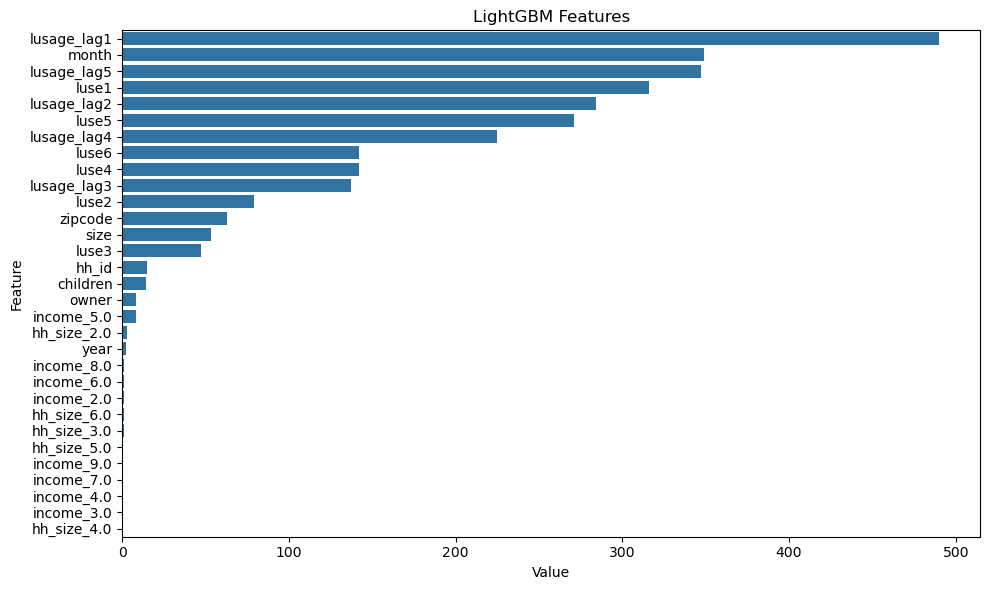

In [26]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [27]:
# The model performance has improved after adding the new features, now let's check if we can improve it further by tuning the hyperparameters. I will be using the Optuna library for this.

def create_objective(X, y):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
            'num_leaves': trial.suggest_int('num_leaves', 20, 3000),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
        }
        model = LGBMRegressor(**params, random_state=13, verbose=-1)

        tscv = TimeSeriesSplit(n_splits=5)
        mse_scores = []

        for train_index, val_index in tscv.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            mse = mean_squared_error(y_val, y_pred)
            mse_scores.append(mse)
        return np.mean(mse_scores)
    return objective
study = optuna.create_study(direction='minimize')

study.optimize(create_objective(df.drop('lusage', axis=1), df['lusage']), n_trials=100)

[I 2024-08-30 12:57:53,127] A new study created in memory with name: no-name-660f8140-a57d-4f5b-a8e7-df882227e07f
[I 2024-08-30 12:58:02,666] Trial 0 finished with value: 0.08875476343931378 and parameters: {'n_estimators': 171, 'learning_rate': 0.14467059044418001, 'num_leaves': 1254, 'max_depth': 12, 'min_child_samples': 25, 'subsample': 0.7025266968673298, 'colsample_bytree': 0.8070314218502154, 'reg_alpha': 1.74745940978303, 'reg_lambda': 1.2198972237414988e-07}. Best is trial 0 with value: 0.08875476343931378.
[I 2024-08-30 12:58:23,957] Trial 1 finished with value: 0.09666822885365159 and parameters: {'n_estimators': 1370, 'learning_rate': 0.27765730513814396, 'num_leaves': 421, 'max_depth': 8, 'min_child_samples': 64, 'subsample': 0.6364793119616187, 'colsample_bytree': 0.7542904208583928, 'reg_alpha': 8.64234110079789e-08, 'reg_lambda': 3.728541290576987e-06}. Best is trial 0 with value: 0.08875476343931378.
[I 2024-08-30 12:58:41,640] Trial 2 finished with value: 0.09462331475

In [29]:
best_params = study.best_params
best_params

# {'n_estimators': 1114,
#  'learning_rate': 0.02323410948761044,
#  'num_leaves': 626,
#  'max_depth': 6,
#  'min_child_samples': 31,
#  'subsample': 0.8448321501731773,
#  'colsample_bytree': 0.6607055944752639,
#  'reg_alpha': 4.906577313817801e-05,
#  'reg_lambda': 8.762338050859508}

{'n_estimators': 1114,
 'learning_rate': 0.02323410948761044,
 'num_leaves': 626,
 'max_depth': 6,
 'min_child_samples': 31,
 'subsample': 0.8448321501731773,
 'colsample_bytree': 0.6607055944752639,
 'reg_alpha': 4.906577313817801e-05,
 'reg_lambda': 8.762338050859508}

In [42]:
final_model = LGBMRegressor(**best_params, random_state=13)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
rmse, mae, r2, adj_rs = evaluate_model(X_test, y_test, y_pred)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)
print("Adjusted R2: ", adj_rs)

# RMSE:  0.17890236672741647
# MAE:  0.12608327710497064
# R2:  0.9198522998447517
# Adjusted R2:  0.9198132439672239

RMSE:  0.17890236672741647
MAE:  0.12608327710497064
R2:  0.9198522998447517
Adjusted R2:  0.9198132439672239


In [58]:
import scipy.stats as stats

def generate_confidence_intervals(y_test, y_pred, confidence_level=0.95):
    residuals = y_test - y_pred

    std_error = np.std(residuals)
    z_score = stats.norm.ppf((1+confidence_level)/2)
    margin_of_error = z_score * std_error

    lower_bound = y_pred - margin_of_error
    upper_bound = y_pred + margin_of_error

    results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})
    return results_df


In [148]:
# Generate confidence intervals
results_df = generate_confidence_intervals(y_test, y_pred)
results_df['hh_id'] = X_test['hh_id']
results_df['date'] = X_test.index.get_level_values('date')
results_df.reset_index(drop=True, inplace=True)

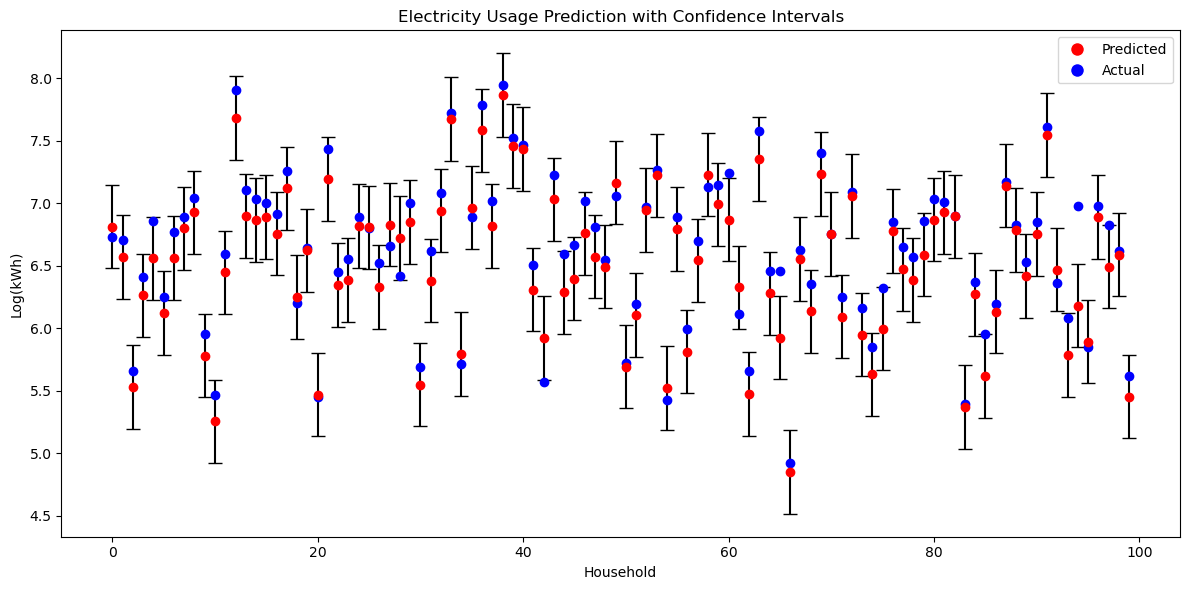

In [162]:
def plot_confidence(results_df):
    n_samples = 100
    plt.figure(figsize=(12, 6))

    # Plot predicted values with error bars
    for i in range(n_samples):
        plt.errorbar(i, results_df['Predicted'][i], 
                     yerr=[[results_df['Predicted'][i] - results_df['Lower Bound'][i]], 
                           [results_df['Upper Bound'][i] - results_df['Predicted'][i]]], 
                     fmt='o', color='red', ecolor='black', capsize=5)

    # Plot actual values
    for i in range(n_samples):
        plt.plot(i, results_df['Actual'][i], 'o', color='blue')

    # Create custom legend handles
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Actual')]

    plt.legend(handles=legend_elements)
    plt.xlabel('Household')
    plt.ylabel('Log(kWh)')
    plt.title('Electricity Usage Prediction with Confidence Intervals')
    plt.tight_layout()
    plt.show()
plot_confidence(results_df)


In [164]:
# This has been such a fun project and could be even more improved by adding more relevant features and creating pipline for the data preprocessing.
# Thanks again for mini challenge, I had a great time working on it. - Răzvan-Gabriel Olariu